In [63]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, KFold, cross_validate, cross_val_predict
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import time
import seaborn as sns
import numpy as np 

In [64]:
# Reset the color palette to default
sns.set_palette(None)
sns.set_style("ticks")

In [65]:
import warnings
warnings.filterwarnings('ignore') 

In [66]:
# define the default font size
plt.rcParams.update({'font.size': 14})

In [67]:
# read in the data
df = pd.read_excel("Dividend_payout_data_new.xlsx")
df.head()

,Symbol,Year,Dividend Payment,ROA,ROE,Free Cash Flow,leverage,Current ratio,Company Market Cap,Market to book ratio,Company age,Public age,Exchange Name,GICS Industry Name,Type,"Cash from Operating Activities, Cumulative"
0,CHP.HM,2014,1,6.331501,15.175416,1.979882e+11,1.371418,1.747689,1.824000e+12,1.283550,17,11,HOCHIMINH STOCK EXCHANGE,Independent Power and Renewable Electricity Pr...,Utilities,297341850350
1,POM.HM,2014,0,-0.338181,-1.214096,2.294292e+11,2.693567,1.332835,1.565064e+12,0.668879,22,11,HOCHIMINH STOCK EXCHANGE,Metals & Mining,Material,297341850350
2,V21.HN,2014,0,0.123886,1.329525,5.200922e+09,9.778091,1.097540,8.840000e+09,0.296611,16,11,HANOI STOCK EXCHANGE,Construction & Engineering,Industrials,297341850350
3,LIG.HN,2014,0,1.350044,9.561633,4.579653e+10,6.254353,1.132405,7.906702e+10,0.463967,25,11,HANOI STOCK EXCHANGE,Construction & Engineering,Industrials,297341850350
4,MCC.HN,2014,1,16.401106,19.098559,-5.394960e+09,0.144151,8.078112,5.705109e+10,1.051306,15,11,HANOI STOCK EXCHANGE,Construction Materials,Material,297341850350


In [69]:
# read in the data
df = pd.read_excel("Dividend_payout_data_new.xlsx")

# compute the percentage of missing values in each row
percent_missing = df.isna().sum(axis=1) / len(df.columns)

# compute the average percentage of missing values across all rows
avg_percent_missing = percent_missing.mean()

# print the results
print(f"Percentage of rows with missing values: {avg_percent_missing:.2%}")

Percentage of rows with missing values: 4.15%


,Total,Percent
Market to book ratio,1023,0.178596
Company Market Cap,955,0.166725
Free Cash Flow,386,0.067388
leverage,382,0.066690
ROE,381,0.066515
ROA,376,0.065642
Current ratio,301,0.052549
Symbol,0,0.000000
Year,0,0.000000
Dividend Payment,0,0.000000


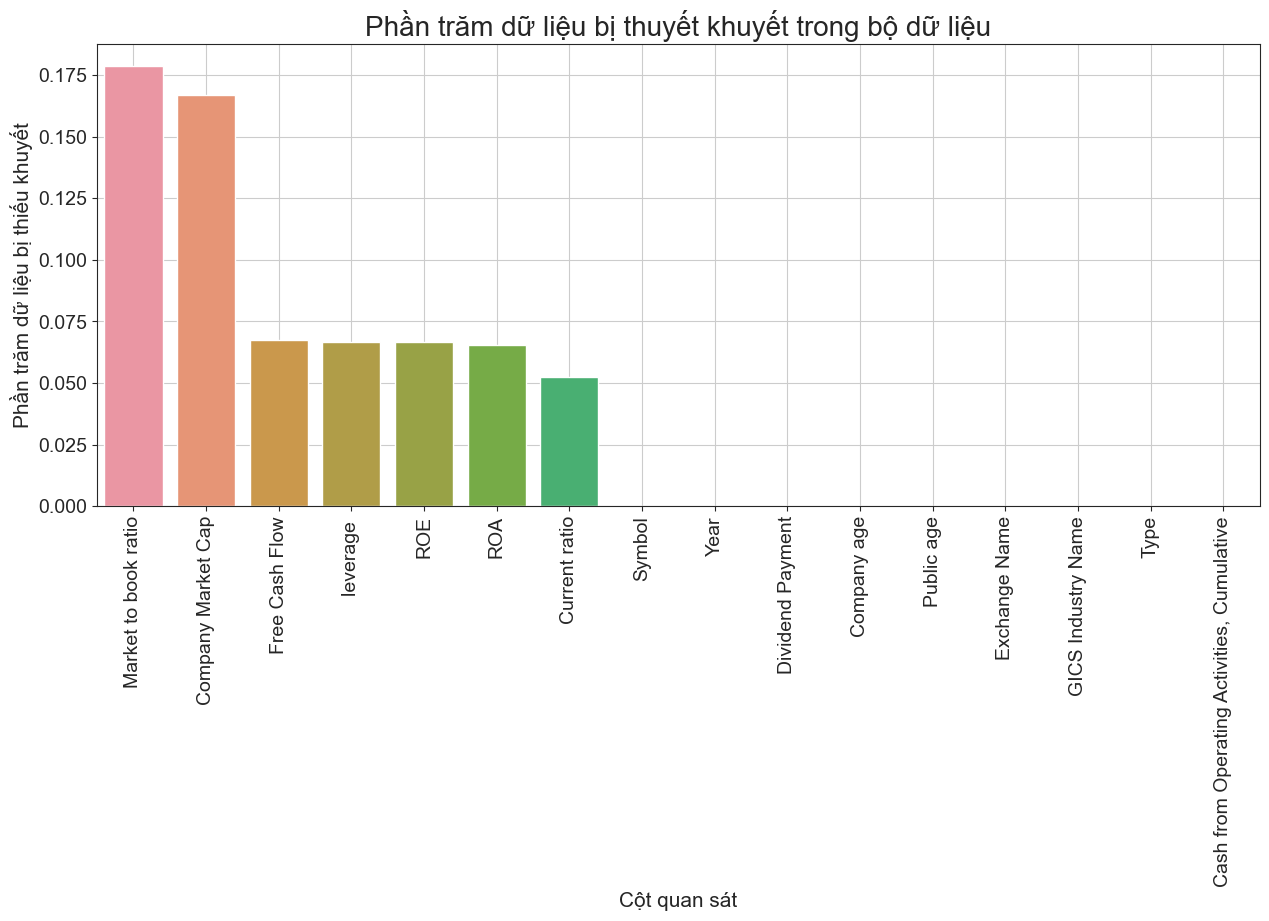

In [70]:
# Phần trăm bị thiếu khuyết
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# phần trăm khuyết = số lượng khuyết / tổng số dòng.
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Visualization missing data
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Cột quan sát', fontsize=15)
plt.ylabel('Phần trăm dữ liệu bị thiếu khuyết', fontsize=15)
plt.title('Phần trăm dữ liệu bị thuyết khuyết trong bộ dữ liệu', fontsize=20)
plt.grid()
missing_data

<AxesSubplot:>

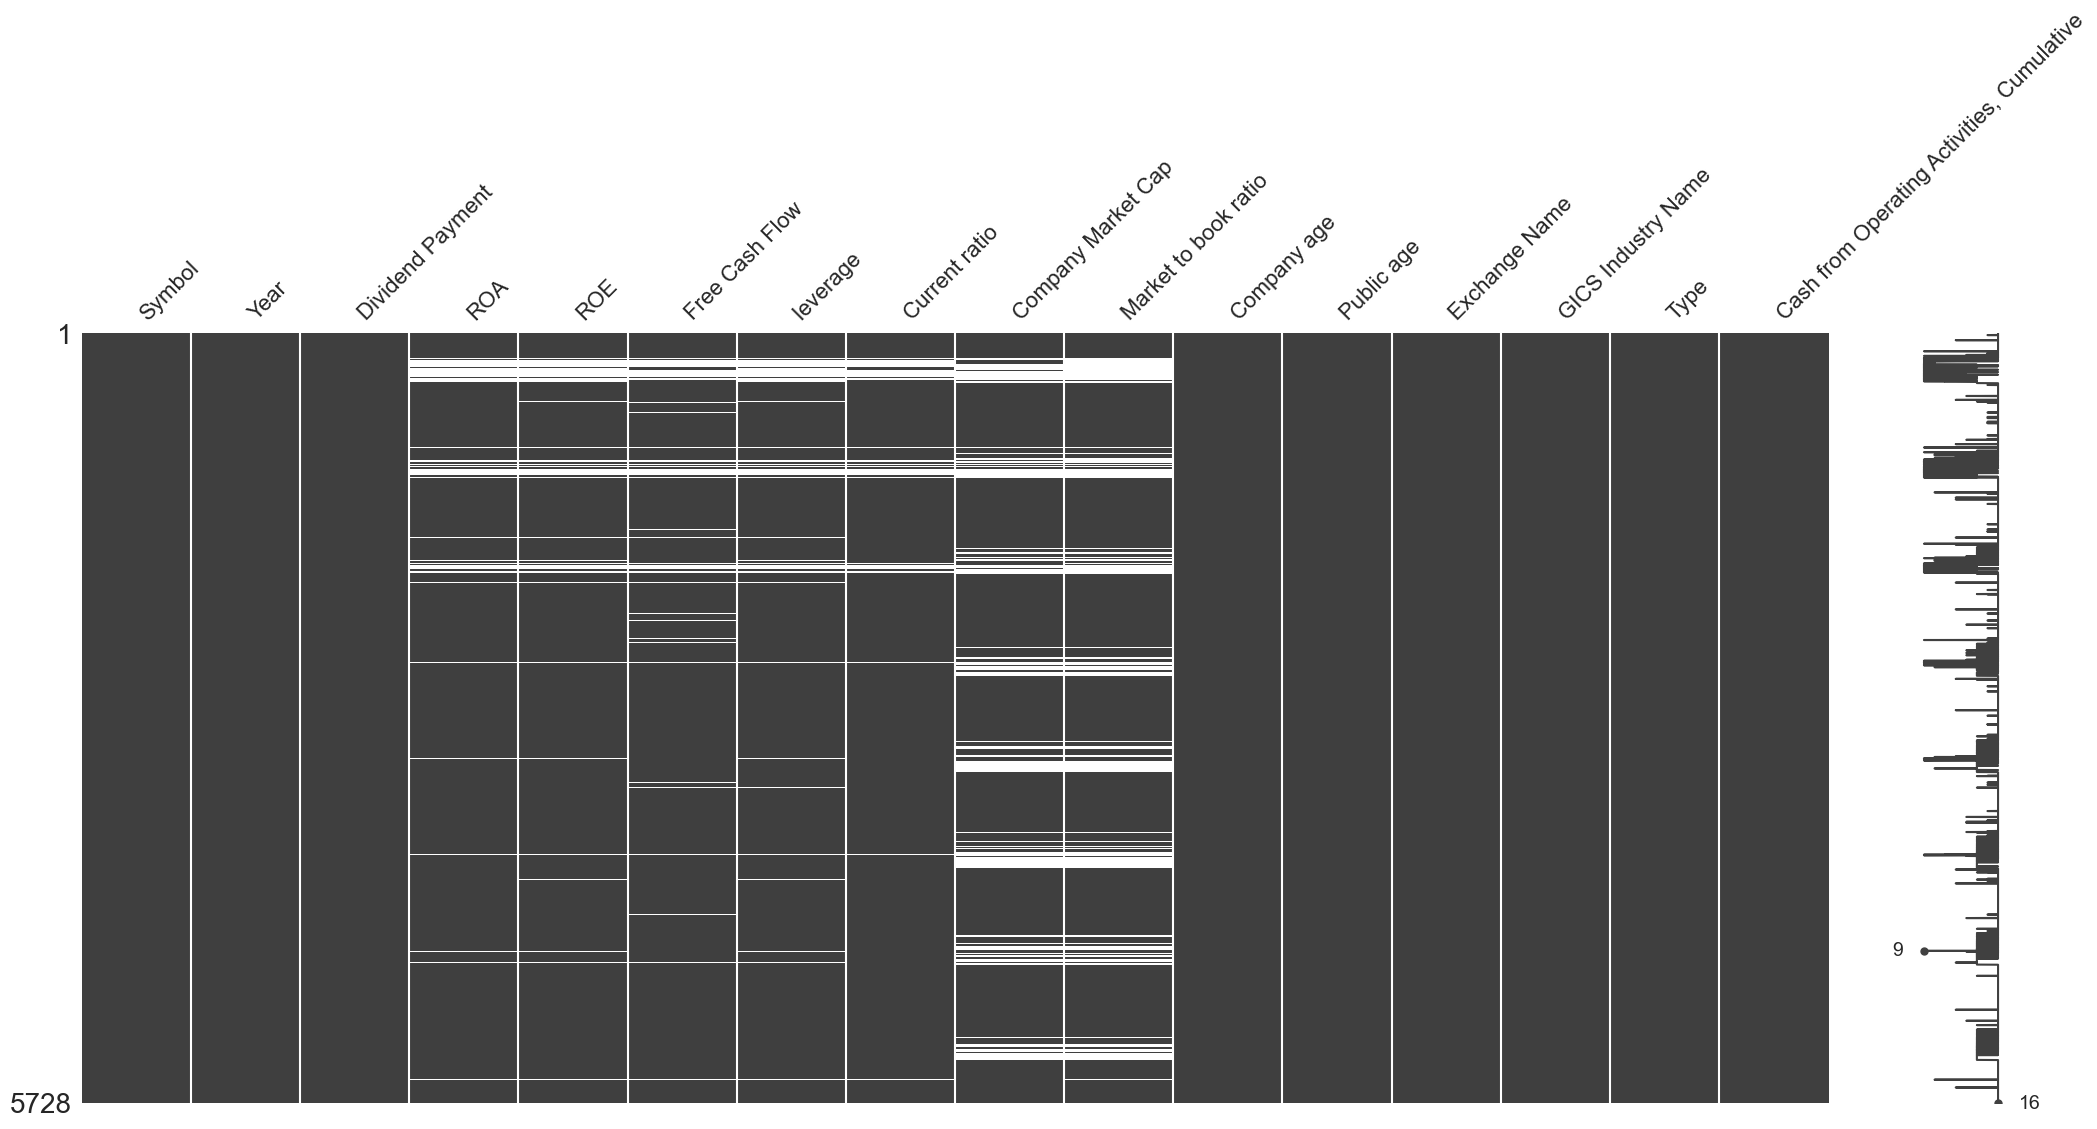

In [71]:
import pandas as pd
import missingno as msno

# create a matrix plot of missing values
msno.matrix(df)


In [72]:
# remove N/A
df = df.dropna()
df.head()

,Symbol,Year,Dividend Payment,ROA,ROE,Free Cash Flow,leverage,Current ratio,Company Market Cap,Market to book ratio,Company age,Public age,Exchange Name,GICS Industry Name,Type,"Cash from Operating Activities, Cumulative"
0,CHP.HM,2014,1,6.331501,15.175416,1.979882e+11,1.371418,1.747689,1.824000e+12,1.283550,17,11,HOCHIMINH STOCK EXCHANGE,Independent Power and Renewable Electricity Pr...,Utilities,297341850350
1,POM.HM,2014,0,-0.338181,-1.214096,2.294292e+11,2.693567,1.332835,1.565064e+12,0.668879,22,11,HOCHIMINH STOCK EXCHANGE,Metals & Mining,Material,297341850350
2,V21.HN,2014,0,0.123886,1.329525,5.200922e+09,9.778091,1.097540,8.840000e+09,0.296611,16,11,HANOI STOCK EXCHANGE,Construction & Engineering,Industrials,297341850350
3,LIG.HN,2014,0,1.350044,9.561633,4.579653e+10,6.254353,1.132405,7.906702e+10,0.463967,25,11,HANOI STOCK EXCHANGE,Construction & Engineering,Industrials,297341850350
4,MCC.HN,2014,1,16.401106,19.098559,-5.394960e+09,0.144151,8.078112,5.705109e+10,1.051306,15,11,HANOI STOCK EXCHANGE,Construction Materials,Material,297341850350


In [73]:
# remove the first 2 columns and last 1 columns
df = df.iloc[:, 2:-1]
df

,Dividend Payment,ROA,ROE,Free Cash Flow,leverage,Current ratio,Company Market Cap,Market to book ratio,Company age,Public age,Exchange Name,GICS Industry Name,Type
0,1,6.331501,15.175416,1.979882e+11,1.371418,1.747689,1.824000e+12,1.283550,17,11,HOCHIMINH STOCK EXCHANGE,Independent Power and Renewable Electricity Pr...,Utilities
1,0,-0.338181,-1.214096,2.294292e+11,2.693567,1.332835,1.565064e+12,0.668879,22,11,HOCHIMINH STOCK EXCHANGE,Metals & Mining,Material
2,0,0.123886,1.329525,5.200922e+09,9.778091,1.097540,8.840000e+09,0.296611,16,11,HANOI STOCK EXCHANGE,Construction & Engineering,Industrials
3,0,1.350044,9.561633,4.579653e+10,6.254353,1.132405,7.906702e+10,0.463967,25,11,HANOI STOCK EXCHANGE,Construction & Engineering,Industrials
4,1,16.401106,19.098559,-5.394960e+09,0.144151,8.078112,5.705109e+10,1.051306,15,11,HANOI STOCK EXCHANGE,Construction Materials,Material
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723,1,0.314662,0.874079,4.491459e+10,1.847085,1.503903,5.972591e+11,0.878609,20,11,HOCHIMINH STOCK EXCHANGE,Building Products,Industrials
5724,0,4.237970,7.027156,1.674845e+10,0.635544,2.609014,2.665900e+11,1.055870,14,11,HANOI STOCK EXCHANGE,Real Estate Management & Development,Real_estate
5725,1,4.712435,9.737101,9.173168e+09,1.226485,1.684698,1.049188e+12,3.745885,29,11,HOCHIMINH STOCK EXCHANGE,Trading Companies & Distributors,Industrials
5726,0,11.209427,13.513555,1.591114e+10,0.304782,3.955457,5.729917e+10,0.491487,21,10,HANOI STOCK EXCHANGE,Pharmaceuticals,Health_care


In [74]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# transform the categorical values to numerical format
encoder = LabelEncoder()
df.iloc[:, -2:] = df.iloc[:, -2:].apply(encoder.fit_transform)

# apply reference encoding to the last two columns
df = pd.get_dummies(df, columns=['Exchange Name', 'Type'], drop_first=True)

# print the transformed data
df.head()

,Dividend Payment,ROA,ROE,Free Cash Flow,leverage,Current ratio,Company Market Cap,Market to book ratio,Company age,Public age,...,Type_1,Type_2,Type_3,Type_4,Type_5,Type_6,Type_7,Type_8,Type_9,Type_10
0,1,6.331501,15.175416,1.979882e+11,1.371418,1.747689,1.824000e+12,1.283550,17,11,...,0,0,0,0,0,0,0,0,0,1
1,0,-0.338181,-1.214096,2.294292e+11,2.693567,1.332835,1.565064e+12,0.668879,22,11,...,0,0,0,0,0,0,0,1,0,0
2,0,0.123886,1.329525,5.200922e+09,9.778091,1.097540,8.840000e+09,0.296611,16,11,...,0,0,0,0,0,1,0,0,0,0
3,0,1.350044,9.561633,4.579653e+10,6.254353,1.132405,7.906702e+10,0.463967,25,11,...,0,0,0,0,0,1,0,0,0,0
4,1,16.401106,19.098559,-5.394960e+09,0.144151,8.078112,5.705109e+10,1.051306,15,11,...,0,0,0,0,0,0,0,1,0,0


In [75]:
# separate the target variable (y) and the features (X)
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [76]:
# normalize the numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [77]:
# define the classification algorithms
models = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier()),
    ('CatBoost', CatBoostClassifier(verbose=0)),
    ('ANN', MLPClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Bagging', BaggingClassifier())
]

## Warning: This block take almost 5 mins to run

In [78]:
# evaluate each algorithm using 10-fold cross-validation and compute classification report
results = []
names = []
reports = []
times = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    
    start_time = time.time()
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    end_time = time.time()
    
    y_pred = cross_val_predict(model, X, y, cv=kfold)
    report = classification_report(y, y_pred, output_dict=True)
    reports.append(report)
    
    results.append(cv_results)
    names.append(name)
    times.append(end_time - start_time)

    print(f"{name} - Mean Accuracy: {cv_results.mean():.3f}, Std Dev: {cv_results.std():.3f}")
    print(f"{name} - Mean Time: {times[-1]:.3f} seconds")

Logistic Regression - Mean Accuracy: 0.656, Std Dev: 0.019
Logistic Regression - Mean Time: 0.085 seconds
KNN - Mean Accuracy: 0.735, Std Dev: 0.016
KNN - Mean Time: 0.383 seconds
Naive Bayes - Mean Accuracy: 0.509, Std Dev: 0.029
Naive Bayes - Mean Time: 0.028 seconds
SVM - Mean Accuracy: 0.678, Std Dev: 0.018
SVM - Mean Time: 6.202 seconds
Decision Tree - Mean Accuracy: 0.650, Std Dev: 0.021
Decision Tree - Mean Time: 0.368 seconds
Random Forest - Mean Accuracy: 0.740, Std Dev: 0.017
Random Forest - Mean Time: 5.990 seconds
Gradient Boosting - Mean Accuracy: 0.700, Std Dev: 0.022
Gradient Boosting - Mean Time: 7.948 seconds
XGBoost - Mean Accuracy: 0.733, Std Dev: 0.015
XGBoost - Mean Time: 1.799 seconds
LightGBM - Mean Accuracy: 0.739, Std Dev: 0.020
LightGBM - Mean Time: 0.774 seconds
CatBoost - Mean Accuracy: 0.742, Std Dev: 0.024
CatBoost - Mean Time: 22.381 seconds
ANN - Mean Accuracy: 0.715, Std Dev: 0.016
ANN - Mean Time: 24.603 seconds
AdaBoost - Mean Accuracy: 0.676, Std Dev

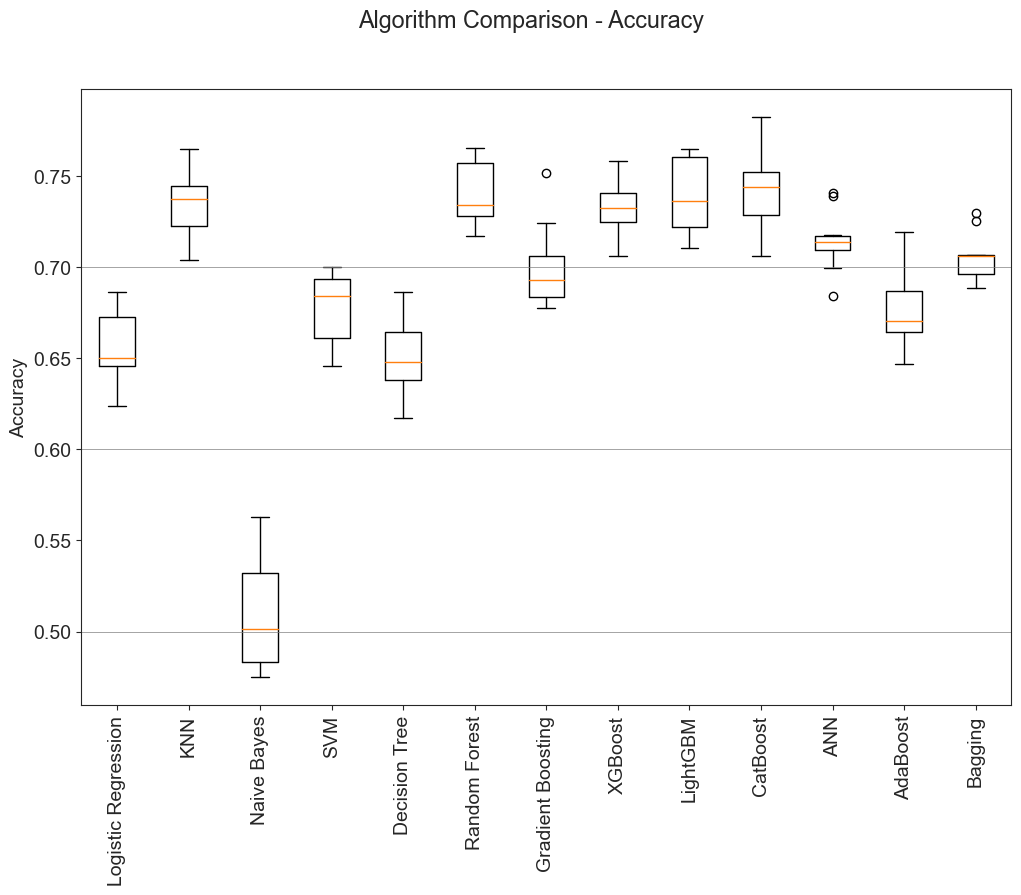

In [79]:
# plot the performance of each algorithm using a box plot
fig1 = plt.figure(figsize=(12, 8))
fig1.suptitle('Algorithm Comparison - Accuracy')
ax1 = fig1.add_subplot(111)
plt.boxplot(results)
ax1.set_xticklabels(names, rotation=90)
ax1.set_ylabel('Accuracy')

# Add horizontal lines at y-ticks
y_ticks = [0.5, 0.6, 0.7]
for y_tick in y_ticks:
    ax1.axhline(y=y_tick, color='grey', linewidth=0.5)
    
plt.show()

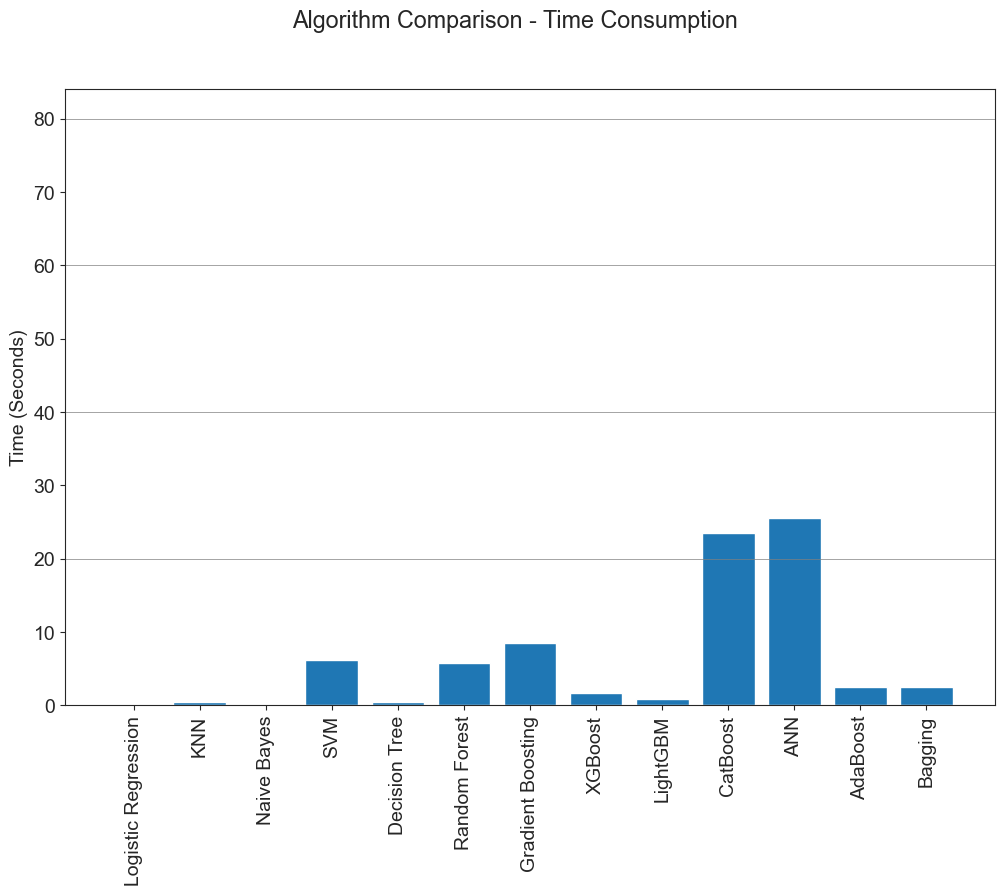

In [ ]:
# plot the time consumption of each algorithm using a bar chart
fig2 = plt.figure(figsize=(12, 8))
fig2.suptitle('Algorithm Comparison - Time Consumption')
ax2 = fig2.add_subplot(111)
ax2.bar(names, times)
ax2.set_xticklabels(names, rotation=90)
ax2.set_ylabel('Time (Seconds)')

# Add horizontal lines at y-ticks
y_ticks = [20, 40, 60, 80]
for y_tick in y_ticks:
    ax2.axhline(y=y_tick, color='grey', linewidth=0.5)

plt.show()

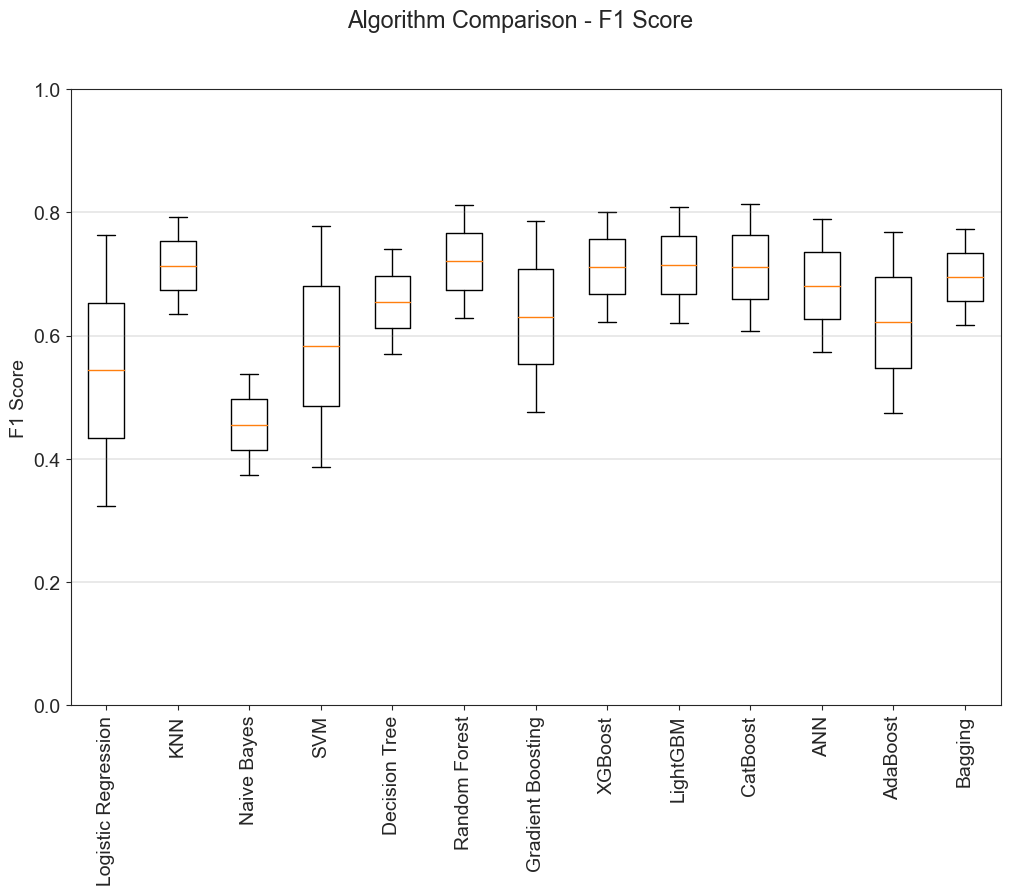

In [ ]:
# compute and plot the f1 score for each algorithm using a box plot
f1_scores = []
for report in reports:
    f1_scores.append([report['0']['f1-score'], report['1']['f1-score']])

fig3 = plt.figure(figsize=(12, 8))
fig3.suptitle('Algorithm Comparison - F1 Score')
ax3 = fig3.add_subplot(111)
ax3.boxplot(f1_scores)
ax3.set_xticklabels(names, rotation=90)
ax3.set_ylabel('F1 Score')
ax3.set_ylim([0, 1])

# Add horizontal lines at y-ticks 0.2, 0.4, 0.6, 0.8
y_ticks = [0.2, 0.4, 0.6, 0.8]
for y_tick in y_ticks:
    ax3.axhline(y=y_tick, color='grey', linewidth=0.25)

plt.show()

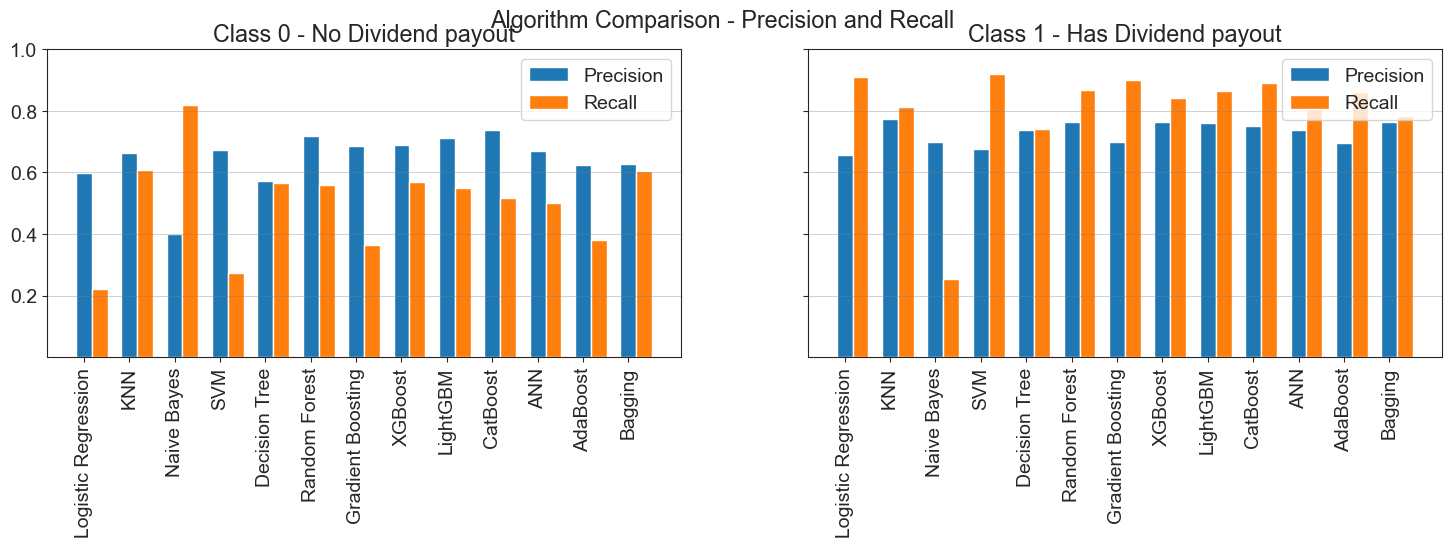

In [ ]:
# compute and plot the precision and recall for each algorithm using a bar chart
precision_0 = []
recall_0 = []
precision_1 = []
recall_1 = []
for report in reports:
    precision_0.append(report['0']['precision'])
    precision_1.append(report['1']['precision'])
    recall_0.append(report['0']['recall'])
    recall_1.append(report['1']['recall'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4), sharey=True)
fig.suptitle('Algorithm Comparison - Precision and Recall')

# subplot for class 0
bar_width = 0.35
ax1.bar(names, precision_0, width=bar_width, label='Precision')
ax1.bar([x + bar_width for x in range(len(names))], recall_0, width=bar_width, label='Recall')
ax1.set_xticklabels(names, rotation=90)
ax1.set_title('Class 0 - No Dividend payout')
ax1.legend()

# subplot for class 1
ax2.bar(names, precision_1, width=bar_width, label='Precision')
ax2.bar([x + bar_width for x in range(len(names))], recall_1, width=bar_width, label='Recall')
ax2.set_xticklabels(names, rotation=90)
ax2.set_title('Class 1 - Has Dividend payout')
ax2.legend()

# set y-axis ticks
ax1.set_yticks([0.2, 0.4, 0.6, 0.8, 1])
ax2.set_yticks([0.2, 0.4, 0.6, 0.8, 1])

# add horizontal lines
for ax in (ax1, ax2):
    for y in [0.2, 0.4, 0.6, 0.8, 1]:
        ax.axhline(y=y, color='gray', alpha=0.5, linewidth=0.5)

plt.show()

In [ ]:
# find the best algorithm based on accuracy and f1-score
best_acc_idx = max(range(len(results)), key=lambda i: results[i].mean())
best_f1_idx = f1_scores.index(max(f1_scores, key=lambda x: x[1]))
print(f"Classification Report for the algorithm with highest accuracy: {names[best_acc_idx]}")
print(classification_report(y, cross_val_predict(models[best_acc_idx][1], X, y, cv=kfold)))
print(f"Classification Report for the algorithm with highest F1-score: {names[best_f1_idx]}")
print(classification_report(y, cross_val_predict(models[best_f1_idx][1], X, y, cv=kfold)))  

Classification Report for the algorithm with highest accuracy: Random Forest


TypeError: Singleton array array(1) cannot be considered a valid collection.

In [ ]:
# compute the classification report for each algorithm
precision_0 = []
precision_1 = []
recall_0 = []
recall_1 = []
for report in reports:
    precision_0.append(report['0']['precision'])
    precision_1.append(report['1']['precision'])
    recall_0.append(report['0']['recall'])
    recall_1.append(report['1']['recall'])

# find the best algorithm based on precision for each class
best_prec_0_idx = precision_0.index(max(precision_0))
best_prec_1_idx = precision_1.index(max(precision_1))

# find the best algorithm based on recall for each class
best_recall_0_idx = recall_0.index(max(recall_0))
best_recall_1_idx = recall_1.index(max(recall_1))

# generate the classification reports for the best algorithms for each metric
print(f"Classification Report for Algorithm with Highest Precision for Class 0 ({names[best_prec_0_idx]}):")
print(classification_report(y, cross_val_predict(models[best_prec_0_idx][1], X, y, cv=kfold)))
print(f"Classification Report for Algorithm with Highest Precision for Class 1 ({names[best_prec_1_idx]}):")
print(classification_report(y, cross_val_predict(models[best_prec_1_idx][1], X, y, cv=kfold)))
print(f"Classification Report for Algorithm with Highest Recall for Class 0 ({names[best_recall_0_idx]}):")
print(classification_report(y, cross_val_predict(models[best_recall_0_idx][1], X, y, cv=kfold)))
print(f"Classification Report for Algorithm with Highest Recall for Class 1 ({names[best_recall_1_idx]}):")
print(classification_report(y, cross_val_predict(models[best_recall_1_idx][1], X, y, cv=kfold)))


Classification Report for Algorithm with Highest Precision for Class 0 (CatBoost):


TypeError: Singleton array array(1) cannot be considered a valid collection.

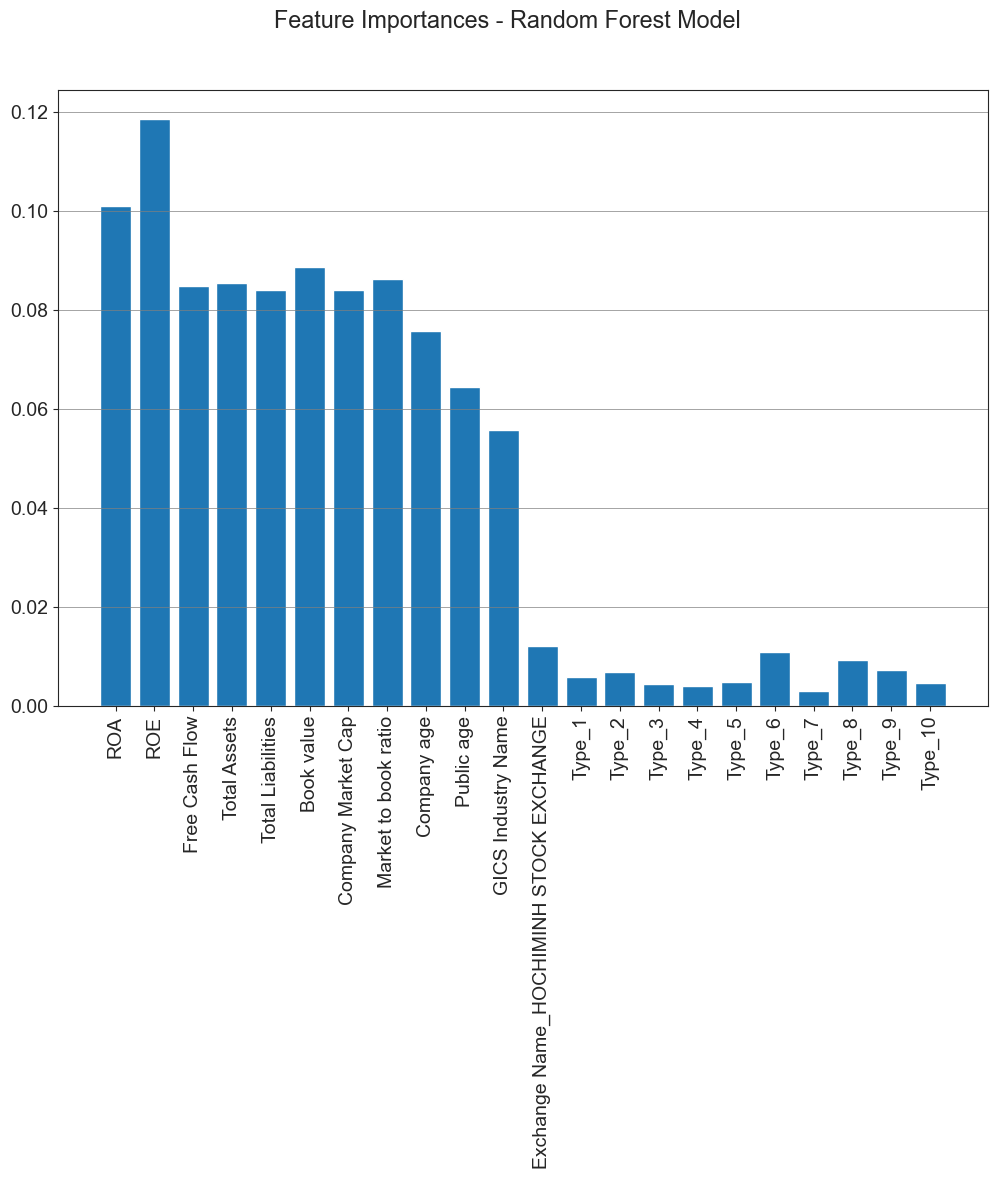

In [ ]:
# define X_train and y_train
y_train = df.iloc[:, 0]
X_train = df.iloc[:, 1:]

# create and fit the random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# compute the feature importances for the random forest model
rf_feature_importances = rf_model.feature_importances_

# plot the feature importances for the random forest model
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Feature Importances - Random Forest Model')
ax.bar(range(len(X_train.columns)), rf_feature_importances)
ax.set_xticks(range(len(X_train.columns)))
ax.set_xticklabels(list(X_train.columns), rotation=90)

# Add horizontal lines at y-ticks 
y_ticks = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12]
for y_tick in y_ticks:
    ax.axhline(y=y_tick, color='grey', linewidth=0.5)

plt.show() 